In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = './data'

train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

In [3]:
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_gen = ImageDataGenerator(rescale=1.0/255.)

In [4]:
IMAGE_SIZE = (224, 224)

train_generator = train_gen.flow_from_directory(
    train_dir, 
    target_size=IMAGE_SIZE, 
    color_mode='rgb', 
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=42,
    subset='training'
)

valid_generator = train_gen.flow_from_directory(
    train_dir, 
    target_size=IMAGE_SIZE, 
    color_mode='rgb', 
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    class_mode='categorical', 
    batch_size=32, 
    shuffle=False, 
    seed=42,
    subset='validation'
)

test_generator = test_gen.flow_from_directory(
    test_dir, 
    target_size=IMAGE_SIZE, 
    color_mode='rgb', 
    classes=['NORMAL', 'COVID19', 'PNEUMONIA'],
    class_mode='categorical', 
    batch_size=32, 
    shuffle=False, 
    seed=42
)

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [5]:
URL = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

IMG_WIDTH, IMG_HEIGHT = IMAGE_SIZE

feature_extractor = hub.KerasLayer(URL, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

feature_extractor.trainable = False

In [6]:
tf.keras.backend.clear_session()

num_classes = 3

model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1280, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(540, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 2048)              23564800  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1280)              2622720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 540)               691740    
_________________________________________________________________
dropout_2 (Dropout)          (None, 540)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
loss, accuracy = model.evaluate(test_generator)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


41/41 [==============================] - 17s 417ms/step - loss: 0.8826 - accuracy: 0.6351

Loss after training: 0.883
Accuracy after training: 63.509%


In [9]:
EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=10,
    restore_best_weights=True
)
save_best = tf.keras.callbacks.ModelCheckpoint('./model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_generator, 
    epochs = EPOCHS, 
    validation_data=valid_generator, 
    callbacks=[early_stopping, save_best]
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 129 steps, validate for 33 steps
Epoch 1/100
129/129 [==============================] - 108s 839ms/step - loss: 0.5936 - accuracy: 0.8122 - val_loss: 0.2693 - val_accuracy: 0.8930
Epoch 2/100
129/129 [==============================] - 105s 814ms/step - loss: 0.3384 - accuracy: 0.8644 - val_loss: 0.2656 - val_accuracy: 0.9251
Epoch 3/100
129/129 [==============================] - 105s 811ms/step - loss: 0.2950 - accuracy: 0.8810 - val_loss: 0.1959 - val_accuracy: 0.9300
Epoch 4/100
129/129 [==============================] - 105s 812ms/step - loss: 0.2868 - accuracy: 0.8890 - val_loss: 0.1732 - val_accuracy: 0.9407
Epoch 5/100
129/129 [==============================] - 104s 810ms/step - loss: 0.2726 - accuracy: 0.8972 - val_loss: 0.2129 - val_accuracy: 0.9163
Epoch 6/100
129/129 [==============================] - 104s 810ms/step - loss: 0.2619 - accuracy: 0.9011 - val_loss: 0.1747 - val_accuracy: 0.9504
Epoch 7/100
129/129 [==============================] - 104s 809ms/step - lo

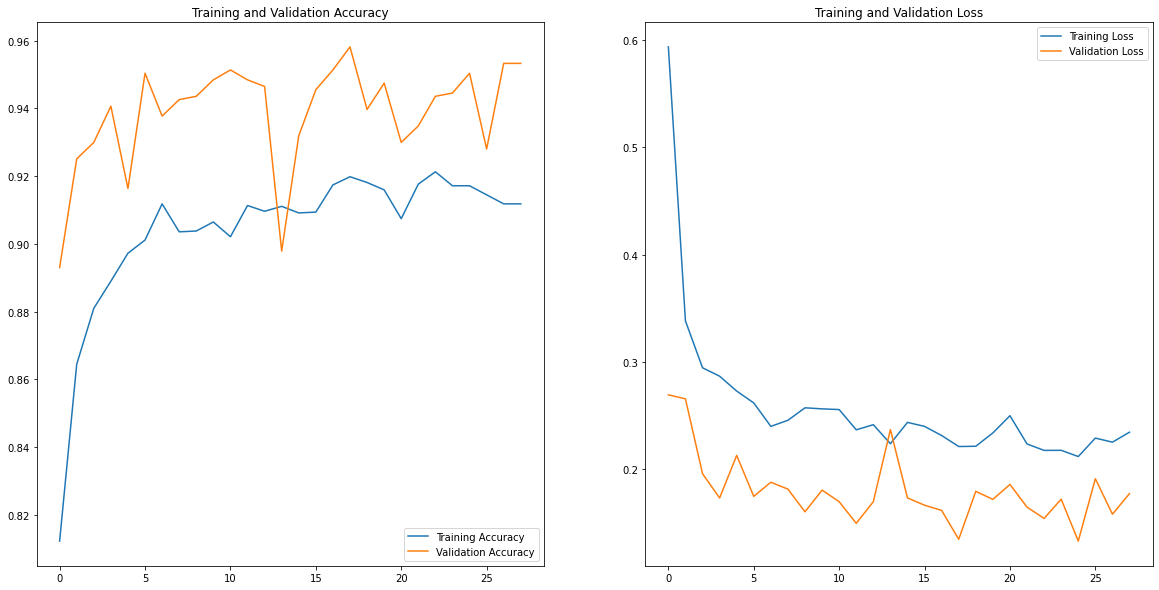

In [10]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

  ...
    to  
  ['...']


  ...
    to  
  ['...']


12/41 [=======>......................] - ETA: 20s - loss: 0.1582 - accuracy: 0.9349